# Import Libraries

In [711]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 


from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans

from matplotlib.pyplot import cm

In [137]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA



# Call pickle

In [4]:
with open('predictors_processed.pkl', 'rb') as f:
    predictors = pickle.load(f)

In [5]:
with open('fifa_processed.pkl', 'rb') as f:
    fifa = pickle.load(f)

In [14]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0   0           L. Messi   31   Argentina       94         94   
1   1  Cristiano Ronaldo   33    Portugal       94         94   
2   2          Neymar Jr   26      Brazil       92         93   
3   3             De Gea   27       Spain       91         93   
4   4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202               0   
1             Juventus   77000000.0  405000.0     2228               1   
2  Paris Saint-Germain  118500000.0  290000.0     2143               1   
3    Manchester United   72000000.0  260000.0     1471               1   
4      Manchester City  102000000.0  355000.0     2281               1   

   International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
0                       5.0        4.0          4.0      Lean          1   
1                       5.0        4.0          5.0    Normal          1   
2                       5.0        5.0          5.0      Lean          1   
3                       4.0        3.0          1.0      Lean          1   
4                       4.0        5.0          4.0    Normal          1   

  Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
0       RF           10.0    5297            0                     3     170   
1       ST            7.0     175            0                     4     188   
2       LW           10.0     516            0                     4     175   
3       GK            1.0    2741            0                     2     193   
4      RCM            7.0    1220            0                     5     180   

   Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
0     159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
1     183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81   
2     150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
3     168   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   
4     154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   

   RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
0  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
1  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0   
2  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
3   0    0    0    0    0    0   0    0   0    0   0      17.0       13.0   
4  88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0 

In [10]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Jersey Number  Joined  Loaned From  \
0        4.0          4.0          1           10.0    5297            0   
1        4.0          5.0          1            7.0     175            0   
2        5.0          5.0          1           10.0     516            0   
3        3.0          1.0          1            1.0    2741            0   
4        5.0          4.0          1            7.0    1220            0   

   Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  \
0                     3     170     159  88  88  88  92  93  93  93  92   93   
1                     4     188     183  91  91  91  89  90  90  90  89   88   
2                     4     175     150  84  84  84  89  89  89  89  89   89   
3                     2     193     168   0   0   0   0   0   0   0   0    0   
4                     5     180     154  82  82  82  87  87  87  87  87   88   

   CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0   93   93  91   84  84   84  91   64   61   61   61   64  59   47  47   47   
1   88   88  88   81  81   81  88   65   61   61   61   65  61   53  53   53   
2   89   89  88   81  81   81  88   65   60   60   60   65  60   47  47   47   
3    0    0   0    0   0    0   0    0    0    0    0    0   0    0   0    0   
4   88   88  88   87  87   87  88   77   77   77   77   77  73   66  66   66   

   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0  59      84.0       95.0             70.0          90.0     86.0       97.0   
1  61      84.0       94.0             89.0          81.0     87.0       88.0   
2  60      79.0       87.0             62.0          84.0     84.0       96.0   
3   0      17.0       13.0             21.0          50.0     13.0       18.0   
4  73      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  ...  Club_Reputation  Position_Potential  \
0   93.0        94.0         87.0  ...         2.242424                   2   
1   81.0        76.0         77.0  ...         2.520000                   3   
2   88.0        87.0         78.0  ...         2.233333                   3   
3   21.0        19.0         51.0  ...         2.090909                   0   
4   85.0        83.0         91.0  ...         2.090909                   3   

   Attacking  Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0       85.0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1       87.0   83.2      86.6   90.0  74.833333  27.333333         11.6   
2       79.2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3       22.8   30.2      61.6   43.4  42.666667  16.333333         88.8   
4       80.8   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0      

In [13]:
#Drop unimportant features for recommendation
predictors = predictors.drop(['Jersey Number','Loaned From', 'Joined','Contract Valid Until'], axis = 1)

In [15]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Height  Weight  LS  ST  RS  LW  LF  CF  \
0        4.0          4.0          1     170     159  88  88  88  92  93  93   
1        4.0          5.0          1     188     183  91  91  91  89  90  90   
2        5.0          5.0          1     175     150  84  84  84  89  89  89   
3        3.0          1.0          1     193     168   0   0   0   0   0   0   
4        5.0          4.0          1     180     154  82  82  82  87  87  87   

   RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
0  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   
1  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   
2  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   
3   0   0    0    0    0   0    0   0    0   0    0    0    0    0    0   0   
4  87  87   88   88   88  88   87  87   87  88   77   77   77   77   77  73   

   LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0   47  47   47  59      84.0       95.0             70.0          90.0   
1   53  53   53  61      84.0       94.0             89.0          81.0   
2   47  47   47  60      79.0       87.0             62.0          84.0   
3    0   0    0   0      17.0       13.0             21.0          50.0   
4   66  66   66  73      93.0       82.0             55.0          92.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
3     13.0       18.0   21.0        19.0         51.0         42.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   

   Acceleration  SprintSpeed  Agility  ...  Club_Reputation  \
0          91.0         86.0     91.0  ...         2.242424   
1          89.0         91.0     87.0  ...         2.520000   
2          94.0         90.0     96.0  ...         2.233333   
3          57.0         58.0     60.0  ...         2.090909   
4          78.0         76.0     79.0  ...         2.090909   

   Position_Potential  Attacking  Skill  Movement  Power  Mentality  \
0                   2       85.0   93.4      91.6   75.6  71.500000   
1                   3       87.0   83.2      86.6   90.0  74.833333   
2                   3       79.2   88.8      91.6   70.6  73.833333   
3                   0       22.8   30.2      61.6   43.4  42.666667   
4                   3       80.8   87.2      80.2   82.0  80.833333   

   Defending  GoalKeeping  Potential_Difference  Body Type  Attack_WR  \
0  29.000000         10.8                     0          1          2   
1  27.333333         11.6                     0          2          3   
2  28.000000         11.8                     1          1          3   
3  16.333333         88.8                     2          1          2   
4  59.000000         11.2                     1          2          3   

   Defense_WR  Position_CAM  Position_CB  Position_CDM  Position_CF  \
0           2             0            0             0            0   
1           1             0            0             0            0   
2           2             0            0             0            0   
3           2             0            0             0            0   
4           3             0            0             0            0   

   Position_CM  

### Standardize the numeric columns

In [35]:
#Seperate the continuous/numeric columns from the indicator/dummy/ordinal columns

numeric_cols=['Age', 'Overall','Potential','Special','International Reputation', 'Weak Foot', 'Skill Moves',
               'Height', 'Weight','LS','ST','RS',  'LW',  'LF',  'CF',  'RF',  'RW',  'LAM',  'CAM',  'RAM', 
               'LM',  'LCM',  'CM',  'RCM',  'RM',  'LWB',  'LDM',  'CDM',  'RDM',  'RWB',  'LB',  'LCB',  'CB',
               'RCB',  'RB',  'Crossing',  'Finishing',  'HeadingAccuracy',  'ShortPassing',  'Volleys', 
               'Dribbling',  'Curve',  'FKAccuracy',  'LongPassing',  'BallControl',  'Acceleration',  
               'SprintSpeed',  'Agility',  'Reactions',  'Balance',  'ShotPower',  'Jumping',  'Stamina',  
               'Strength',  'LongShots',  'Aggression',  'Interceptions',  'Positioning',  'Vision',  
               'Penalties',  'Composure',  'Marking',  'StandingTackle',  'SlidingTackle',  'GKDiving',  
               'GKHandling',  'GKKicking',  'GKPositioning',  'GKReflexes',  'Club_Reputation',  
               'Position_Potential',  'Attacking',  'Skill',  'Movement',  'Power',  'Mentality',  
               'Defending',  'GoalKeeping',  'Potential_Difference',  'Attack_WR',  'Defense_WR']

non_numeric_cols=['Position_CAM',  'Position_CB',  'Position_CDM',  'Position_CF',  'Position_CM',  
                   'Position_GK',  'Position_LAM',  'Position_LB',  'Position_LCB',  'Position_LCM',  
                   'Position_LDM',  'Position_LF',  'Position_LM',  'Position_LS',  'Position_LW',  
                   'Position_LWB',  'Position_RAM',  'Position_RB',  'Position_RCB',  'Position_RCM',  
                   'Position_RDM',  'Position_RF',  'Position_RM',  'Position_RS',  'Position_RW',  
                   'Position_RWB',  'Position_ST',  'Continent_Africa',  'Continent_Asia',  'Continent_Europe',
                   'Continent_North America',  'Continent_Oceania',  'Continent_South America',  
                   'Position_Group_Defender',  'Position_Group_Forward',  'Position_Group_GoalKeeper', 
                   'Position_Group_Midfielder', 'Preferred Foot','Real Face','Body Type']

121

In [788]:
#Check that we have covered all the columns
len(predictors.columns) == len(numeric_cols) + len(non_numeric_cols)

True

In [38]:
#Create scaler
scl = StandardScaler()

#Scale the numeric columns
predictors_num = pd.DataFrame(scl.fit_transform(predictors[numeric_cols]), columns=numeric_cols)

#Merge scaled numerics with the dummy/ordinal columns
predictors_scaled = pd.concat([predictors_num,predictors[non_numeric_cols]], axis=1)

In [41]:
predictors_scaled.head()

Age   Overall  Potential   Special  International Reputation  \
0  1.258441  4.013364   3.697415  2.213984                  9.864420   
1  1.686666  4.013364   3.697415  2.309273                  9.864420   
2  0.187878  3.724114   3.534396  1.997752                  9.864420   
3  0.401990  3.579489   3.534396 -0.465097                  7.326477   
4  0.401990  3.579489   3.371377  2.503515                  7.326477   

   Weak Foot  Skill Moves    Height    Weight        LS        ST        RS  \
0   1.593944     2.167171 -1.670713 -0.447583  1.818665  1.818665  1.818665   
1   1.593944     3.489672  1.019186  1.091577  1.967451  1.967451  1.967451   
2   3.108090     3.489672 -0.923519 -1.024769  1.620283  1.620283  1.620283   
3   0.079797    -1.800331  1.766380  0.129602 -2.545731 -2.545731 -2.545731   
4   3.108090     2.167171 -0.176325 -0.768242  1.521092  1.521092  1.521092   

         LW        LF        CF        RF        RW       LAM       CAM  \
0  1.901392  1.973099  1.973099  1.973099  1.901392  1.957564  1.957564   
1  1.757292  1.828258  1.828258  1.828258  1.757292  1.716682  1.716682   
2  1.757292  1.779978  1.779978  1.779978  1.757292  1.764859  1.764859   
3 -2.517663 -2.516977 -2.516977 -2.516977 -2.517663 -2.522831 -2.522831   
4  1.661226  1.683417  1.683417  1.683417  1.661226  1.716682  1.716682   

        RAM        LM       LCM        CM       RCM        RM       LWB  \
0  1.957564  1.828702  1.603458  1.603458  1.603458  1.828702  0.646400   
1  1.716682  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
2  1.764859  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
3 -2.522831 -2.554472 -2.565223 -2.565223 -2.565223 -2.554472 -2.551047   
4  1.716682  1.684202  1.752340  1.752340  1.752340  1.684202  1.295881   

        LDM       CDM       RDM       RWB        LB       LCB        CB  \
0  0.519988  0.519988  0.519988  0.646400  0.427328 -0.114632 -0.114632   
1  0.519988  0.519988  0.519988  0.696360  0.527106  0.174842  0.174842   
2  0.470696  0.470696  0.470696  0.696360  0.477217 -0.114632 -0.114632   
3 -2.486788 -2.486788 -2.486788 -2.551047 -2.516127 -2.382176 -2.382176   
4  1.308650  1.308650  1.308650  1.295881  1.125774  0.802035  0.802035   

        RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0 -0.114632  0.427328  1.865922   2.532567         1.018552      2.130287   
1  0.174842  0.527106  1.865922   2.481351         2.111799      1.518005   
2 -0.114632  0.477217  1.593650   2.122842         0.558238      1.722099   
3 -2.382176 -2.516127 -1.782517  -1.667116        -1.800873     -0.590969   
4  0.802035  1.125774  2.356010   1.866764         0.155463      2.266350   

    Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
0  2.435355   2.201445  2.491426    2.925736     2.237037     2.255198   
1  2.491871   1.725503  1.839066    1.895887     1.584613     2.135338   
2  2.322322   2.148563  2.219609    2.525239     1.649855     2.195268   
3 -1.690356  -1.976272 -1.422733   -1.365303    -0.111691    -0.981022   
4  2.209288   1.619738  2.056519    2.296384     2.498007     1.955548   

   Acceleration  SprintSpeed   Agility  Reactions   Balance  ...  Attacking  \
0      1.767621     1.452129  1.862187   3.680643  2.195382  ...   2.367037   
1      1.633639     1.793436  1.591288   3.791628  0.426820  ...   2.501665   
2      1.968594     1.725175  2.200811   3.569658  1.417214  ...   1.976617   
3     -0.510075    -0.459193 -0.237281   3.125717 -1.483228  ...  -1.819883   
4      0.896737     0.769514  1.049490   3.236703  0.922017  ...   2.084319   

      Skill  Movement     Power  Mentality  Defending  GoalKeeping  \
0  2.652691  2.491225  1.477531   1.581089  -0.874941    -0.333393   
1  2.010038  2.044295  2.777910   1.853981  -0.956497    -0.286336   
2  2.362867  2.491225  1.026010   1.772114  -0.923875    -0.274572   
3 -1.329238 -0.190353 -1.430261  -0.779428  -1.494763     4.254638   
4  2.262059  1

# Function for filtering for specific Overall & Position

Function = filter_players(position, ovr_min = 0, ovr_max= 100) 
- Accepts a position name and overall range and returns a filtered dataframe of the players that meet those criteria. For positions with few players (LS,RS, etc.) it also returns players from the most similar position (so its not as limited).

In [797]:
def filter_players(position, ovr_min = 0, ovr_max= 100):
    if str(position) == 'RF':
        indices = list(fifa[(fifa['Position'].isin(['RF','RS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LF':
        indices = list(fifa[(fifa['Position'].isin(['LF','LS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LAM':
        indices = list(fifa[(fifa['Position'].isin(['LAM','LM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'RAM':
        indices = list(fifa[(fifa['Position'].isin(['RAM','RM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    else:
        indices = list(fifa[(fifa['Position'] == position) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    global filtered_df
    global filtered_names
    global filtered_df
    
    filtered_df = predictors.iloc[indices,:]
    #filtered_df_scaled = predictors_scaled.iloc[indices,:]
    
    filtered_list = list(fifa.iloc[indices,:].ID)
    
    filtered_names = fifa.Name[fifa.ID.isin(filtered_list)]
    
    return filtered_list, filtered_names , filtered_df
    

In [784]:
posit = input("Enter the position looking for: \n")
over_min = input("What is the min overall?: \n")
over_max = input("What is the max overall?: \n")

filtered_players = filter_players(str(posit), int(over_min), int(over_max))

print("Here are the filtered players based on your criteriea:")# + ('\n'*2))
display(list(filtered_players[1]))


print("Here are the filtered players' features based on your criteriea: ")
filtered_players[2]

Enter the position looking for: 
CM
What is the min overall?: 
74
What is the max overall?: 
86
Here are the filtered players based on your criteriea:


['Thiago',
 'S. Milinković-Savić',
 'Jorginho',
 'I. Gündoğan',
 'N. Keïta',
 'C. Tolisso',
 'A. Rabiot',
 'L. Goretzka',
 'J. Draxler',
 'Cesc Fàbregas',
 'M. Dembélé',
 'Rodri',
 'Fred',
 'G. Kondogbia',
 'M. Götze',
 'G. Bonaventura',
 'A. Guardado',
 'Ander Herrera',
 'K. Boateng',
 'H. Herrera',
 'J. Milner',
 'T. Ndombele',
 'M. Dahoud',
 'E. Can',
 'L. Paredes',
 'A. Oxlade-Chamberlain',
 'Bruno',
 'A. Lallana',
 'F. Kessié',
 'R. Battaglia',
 'Denis Suárez',
 'M. van Ginkel',
 'Sérgio Oliveira',
 'J. Wilshere',
 'D. Drinkwater',
 'Adrien Silva',
 'M. Fellaini',
 'E. Belözoğlu',
 'L. Pellegrini',
 'S. Lobotka',
 'Y. Tielemans',
 'N. Bentaleb',
 'Óliver Torres',
 'Andreas Pereira',
 'B. Cristante',
 'L. Castro',
 'A. Trebel',
 'V. Darida',
 'P. Hernández',
 'B. Natcho',
 'Z. Junuzović',
 'J. Shelvey',
 'G. Castro',
 'Gabriel',
 'T. Vilhena',
 'S. Sydorchuk',
 'V. Odjidja-Ofoe',
 'L. Cook',
 'P. Pérez',
 'Mikel San José',
 'A. Bertolacci',
 'D. Garmash',
 'T. Rincón',
 'M. Sissoko

Here are the filtered players' features based on your criteriea: 


Age  Overall  Potential  Special  Preferred Foot  \
67     27       86         86     2190               1   
78     23       85         90     2206               1   
121    26       84         87     2136               1   
136    27       84         84     2138               1   
161    23       83         88     2082               1   
162    23       83         88     2207               1   
168    23       83         87     2184               0   
169    23       83         88     2203               1   
184    24       83         86     2112               1   
219    31       83         83     2040               1   
220    30       83         83     2177               0   
227    22       82         87     2055               1   
250    25       82         84     2180               0   
262    25       82         85     2171               0   
280    26       82         85     2101               1   
284    28       82         82     2207               1   
306    31       82         82     2146               0   
374    28       81         81     2170               1   
391    31       81         81     2168               1   
406    28       81         81     2106               1   
409    32       81         81     2126               1   
414    21       80         89     2096               1   
435    22       80         86     2052               1   
448    24       80         85     2153               1   
452    24       80         85     2122               1   
481    24       80         85     2125               1   
513    34       80         80     1967               0   
515    30       80         80     2086               1   
562    21       79         88     2149               1   
587    26       79         80     2030               1   
613    24       79         86     2016               1   
641    25       79         80     2102               1   
651    26       79         82     2049               1   
671    26       79         81     2050               0   
681    28       79         79     2023               1   
685    29       79         79     2083               1   
700    30       79         79     1994               1   
725    37       79         79     2047               0   
746    22       78         84     2027               1   
774    23       78         84     1954               1   
775    21       78         87     2088               1   
791    23       78         83     2044               0   
804    23       78         83     1977               1   
807    22       78         84     2100               1   
809    23       78         86     1944               1   
820    29       78         78     2060               1   
829    27       78         79     2106               0   
836    27       78         78     2083               1   
843    31       78         78     2022               0   
848    30       78         78     2078               1   
...   ...      ...        ...      ...             ...   
1630   26       75         77     2060               1   
1631   20       75         81     1971               1   
1640   30       75         75     1989               0   
1687   23       75         83     1939               1   
1700   27       75         75     2102               1   
1712   30       75         75     2018               1   
1714   24       75         79     2044               0   
1716   27       75         75     2120               1   
1757   32       75         75     1966               1   
1761   22       75         81     1988               1   
1773   28       75         75     1960               1   
1809   20       75         84     2102               1   
1814   20       75         84     1927               1   
1854   31       75         75     2039               0   
1876   28       75         75     1991               0   
1880   25       75         78     2093               1   
1885   21       75         83     1933               1   
1894

# Similar Player Recommendation

## Recommending K nearest players function

Function = recommended_k_players_df(player, k_players = 100) 
-  Accepts a player's name and number of players to recommend and returns a dataframe of the recommended players and a list of their IDs. The recommendations are limited to players from the same position group.

In [825]:
fifa[fifa.Name.str.contains('Salah')]

ID      Name  Age Nationality  Overall  Potential       Club       Value  \
26  26  M. Salah   26       Egypt       88         89  Liverpool  69500000.0   

        Wage  Special  Preferred Foot  International Reputation  Weak Foot  \
26  255000.0     2146               0                       3.0        3.0   

    Skill Moves Body Type  Real Face Position  Jersey Number  Joined  \
26          4.0      Lean          1       RM           10.0     549   

    Loaned From  Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  \
26            0                     5     175     157  83  83  83  87  86  86   

    RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
26  86  87   86   86   86  86   80  80   80  86   70   66   66   66   70  66   

    LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
26   57  57   57  66      78.0       90.0             59.0          82.0   

    Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
26     73.0       89.0   83.0        60.0         72.0         88.0   

    Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  \
26          94.0         91.0     91.0       91.0     88.0       77.0   

    Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  \
26     68.0     84.0      70.0       83.0        63.0           55.0   

    Positioning  Vision  Penalties  Composure  Marking  StandingTackle  \
26         90.0    82.0       61.0       91.0     38.0            43.0   

    SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
26           41.0      14.0        14.0        9.0           11.0        14.0   

    Release Clause  Club_Reputation Attack_WR Defense_WR Position_Group  \
26     137300000.0         1.969697      High     Medium     Midfielder   

    Position_Potential  Attacking  Skill  Movement  Power  Mentality  \
26                   3       76.4   78.4      91.0   76.4  73.666667   

    Defending  GoalKeeping  Potential_Difference Continent  
26  40.666667         12.4                     1    Africa

In [892]:
def recommended_k_players_df(player, k_players = 100):
    #Find players' position group
    pos_group = list(fifa.Position_Group[fifa['Name']==player])[0]
    
    #Filter df for that position group
    if pos_group == 'Forward':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Midfielder':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Defender':
        indices = list(fifa[fifa.Position_Group == 'Defender'].index.values)
    elif pos_group == 'GoalKeeper':
        indices = list(fifa[fifa.Position_Group == 'GoalKeeper'].index.values)
    
    predictors_scaled_subset = predictors_scaled.iloc[indices,:]
    predictors_subset = predictors.iloc[indices,:]
    
    #Fit KNN for the k_players within that position group
    recommendations2 = NearestNeighbors(n_neighbors=k_players, algorithm='auto').fit(predictors_scaled_subset)

    #Pass the player name from the dataset to the function and get 5 similar players as output
    player_indices2 = recommendations2.kneighbors(predictors_scaled_subset)[1]
    
    #Get player index
    fifa_subset = fifa.iloc[indices,:]
    index = fifa_subset[fifa_subset['Name']==player].index.tolist()[0]
    
    #Make variables global
    global recommend_list
    global recommended_df
    global recommended_names
    
    #Create recommended name list
    recommend_list = []
    #for i in player_indices2[index][1:]:
    #        recommend_list.append(fifa_subset.iloc[i]['Name'])
    
    
    #Get filtered df of recommended players
    recommended_df = predictors_subset.iloc[list(player_indices2[index][:]),:]
    recommend_list = list(fifa_subset.iloc[list(player_indices2[index][:]),:].ID)
    recommend_list.insert(0, index)
    

    recommended_names = fifa.Name[fifa.ID.isin(recommend_list)]
    
    return recommend_list, recommended_names,recommended_df



In [919]:
player = str(input("Enter the player you are looking for: \n"))
num_of_players = input("Enter the number of similar players you are looking for: \n")


recommendation = recommended_k_players_df(player, (int(num_of_players)))
print("Here are {0} players similar to ".format(int(num_of_players)) +  player + ': \n \n' + str(recommendation[1][:]))
print("\n Here are the players' features ")
display(recommendation[2].set_index(pd.Index(fifa.Name[list(recommendation[0][1:])].values)))
#except:
#    print('\n Please enter a valid name (ex. L. Messi) and number of players less than 18159.')



Enter the player you are looking for: 
M. Salah
Enter the number of similar players you are looking for: 
6
Here are 6 players similar to M. Salah: 
 
10    R. Lewandowski
17      A. Griezmann
26          M. Salah
36           G. Bale
45          P. Pogba
68           M. Reus
93        A. Sánchez
Name: Name, dtype: object

 Here are the players' features 


Age  Overall  Potential  Special  Preferred Foot  \
G. Bale          28       88         88     2279               0   
A. Griezmann     27       89         90     2246               0   
M. Reus          29       86         86     2172               1   
R. Lewandowski   29       90         90     2152               1   
A. Sánchez       29       85         85     2172               1   
P. Pogba         25       87         91     2247               1   

                International Reputation  Weak Foot  Skill Moves  Real Face  \
G. Bale                              4.0        3.0          4.0          1   
A. Griezmann                         4.0        3.0          4.0          1   
M. Reus                              4.0        4.0          4.0          1   
R. Lewandowski                       4.0        4.0          4.0          1   
A. Sánchez                           4.0        3.0          4.0          1   
P. Pogba                             4.0        4.0          5.0          1   

                Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  \
G. Bale            185     181  86  86  86  86  86  86  86  86   85   85   85   
A. Griezmann       175     161  86  86  86  87  87  87  87  87   86   86   86   
M. Reus            180     157  82  82  82  85  85  85  85  85   85   85   85   
R. Lewandowski     183     176  87  87  87  83  86  86  86  83   83   83   83   
A. Sánchez         170     163  81  81  81  82  82  82  82  82   82   82   82   
P. Pogba           193     185  81  81  81  82  82  82  82  82   83   83   83   

                LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  \
G. Bale         85   80  80   80  85   73   70   70   70   73  71   67  67   
A. Griezmann    86   80  80   80  86   70   67   67   67   70  67   61  61   
M. Reus         84   79  79   79  84   68   64   64   64   68  64   54  54   
R. Lewandowski  81   77  77   77  81   61   62   62   62   61  58   57  57   
A. Sánchez      82   77  77   77  82   65   64   64   64   65  62   57  57   
P. Pogba        83   84  84   84  83   77   78   78   78   77  75   74  74   

                RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
G. Bale          67  71      87.0       86.0             84.0          85.0   
A. Griezmann     61  67      82.0       90.0             84.0          83.0   
M. Reus          54  64      79.0       87.0             49.0          86.0   
R. Lewandowski   57  58      62.0       91.0             85.0          83.0   
A. Sánchez       57  62      77.0       80.0             73.0          77.0   
P. Pogba         74  75      80.0       73.0             73.0          86.0   

                Volleys  Dribbling  Curve  FKAccuracy  LongPassing  \
G. Bale            85.0       87.0   90.0        87.0         80.0   
A. Griezmann       87.0       88.0   84.0        78.0         76.0   
M. Reus            90.0       87.0   89.0        84.0         75.0   
R. Lewandowski     89.0       85.0   77.0        86.0         65.0   
A. Sánchez         83.0       87.0   79.0        78.0         75.0   
P. Pogba           85.0       87.0   84.0        82.0         90.0   

                BallControl  Acceleration  SprintSpeed  Agility  ...  \
G. Bale                85.0          94.0         95.0     82.0  ...   
A. Griezmann           90.0          88.0         85.0     90.0  ...   
M. Reus                86.0          86.0         85.0     86.0  ...   
R. Lewandowski         89.0          77.0         78.0     78.0  ...   
A. Sánchez             86.0          86.0         79.0     90.0  ...   
P. Pogba               90.0          71.0         79.0     74.0  ...   

                Club_Reputation  Position_Potential  Attacking  Skill  \
G. Bale                2.090909                   3       85.4   85.8   
A. Griezmann           1.878788                   3       85.2   83.2   
M. Reus                2.000000                   3       78.2   84.2   
R. Lewandowski         2.517

## Visualizing Recommended Players

In [896]:
rador_variables = ['Age','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
                 'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
                 'Acceleration','SprintSpeed','Agility','Reactions','Balance',
                 'ShotPower','Jumping','Stamina','Strength','LongShots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties',
                 'Composure','Marking','StandingTackle','SlidingTackle',
                 'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

In [917]:
def SkillChart(graph, abilities, player_name):
    len1 = graph.shape[0]
    len2 = graph.shape[1]
    temp = graph.values.reshape((len1, len2))
    
    tmp = pd.DataFrame(temp, columns = abilities)
    Attributes =list(tmp)
    AttNo = len(Attributes)
    
    plt.figure(figsize=(15,15))
    ax = plt.subplot(111, polar=True)
    
    #colors = ['black', 'blue', 'red', 'green', 'gold', 'pink', 'lightskyblue', 'orange', 'purple', 'yellow']
    color=iter(cm.gist_rainbow(np.linspace(0,1,len1)))
    
    for i in range(len1):
        c=next(color)
        values = tmp.iloc[i].tolist() #
        values += values [:1]
    
        angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
        angles += angles [:1]
        
        plt.xticks(angles[:-1],Attributes)
        ax.plot(angles, values, color = c)
        ax.fill(angles, values, c, alpha=0.1)
        plt.figtext(0.8, 0.2, ("Recommended Players for "+player_name[0]), color = 'black', fontsize=12)
        plt.figtext(0.8, 0.18-0.022*i, player_name[i], color = c, fontsize=12)
    
    plt.show()

In [898]:
standard_player = predictors[rador_variables][fifa.ID.isin(recommend_list)]
#Sort according to recommend list
standard_player = standard_player.loc[recommend_list,:]
standard_player = standard_player.set_index(pd.Index(recommended_names[recommend_list]))
standard_player = standard_player.loc[list(recommended_names[recommend_list]),:]

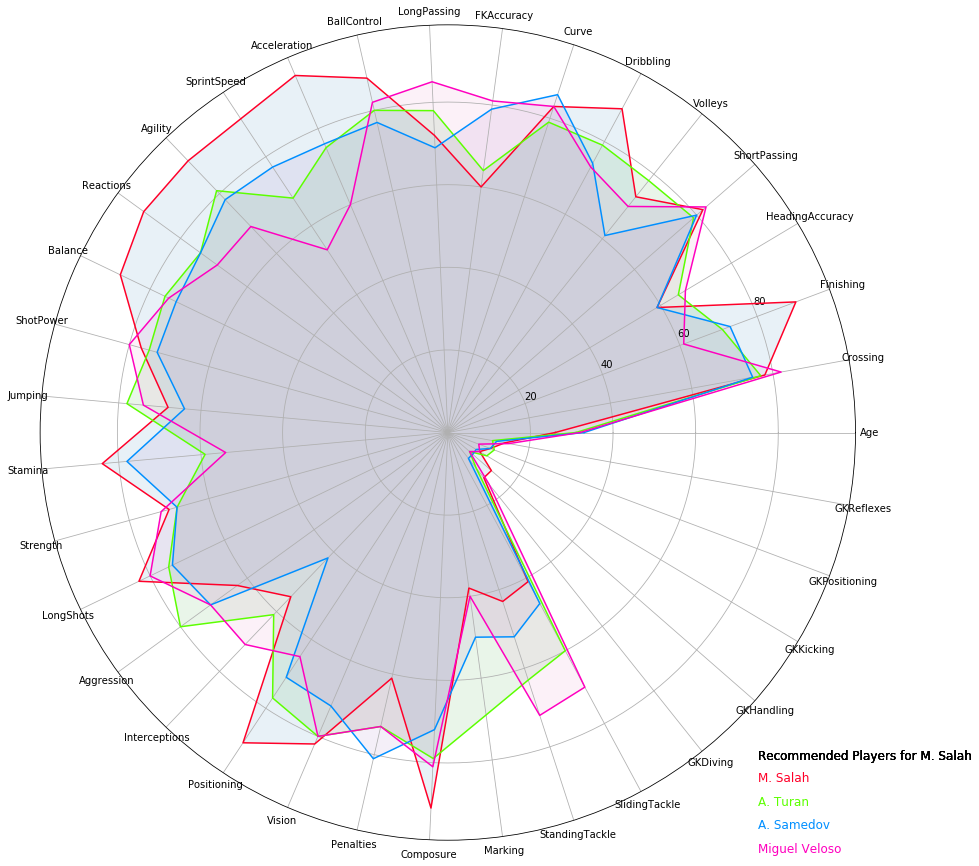

In [918]:
SkillChart(graph= standard_player, 
           abilities = rador_variables, 
           player_name = pd.Series(standard_player.index).values)

# Clustering Visualizations

### Visualizing TSNE with points colored by Value bins (y_binned_quantile)

In [868]:
#Value binning based on 5 quantile groups
y_binned_quantile = pd.qcut(fifa.Value,5, labels=['0-20%','20-40%','40-60%','60-80%','80-100%'])

In [870]:
from sklearn.manifold import TSNE

#scaled = StandardScaler()
#X = scaled.fit_transform(predictors_df)

Xtsne = TSNE(n_components=2).fit_transform(predictors_scaled)
dftsne = pd.DataFrame(Xtsne)
dftsne['Value_Bin'] = y_binned_quantile
dftsne.columns = ['x1','x2','Value_Bin']



Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

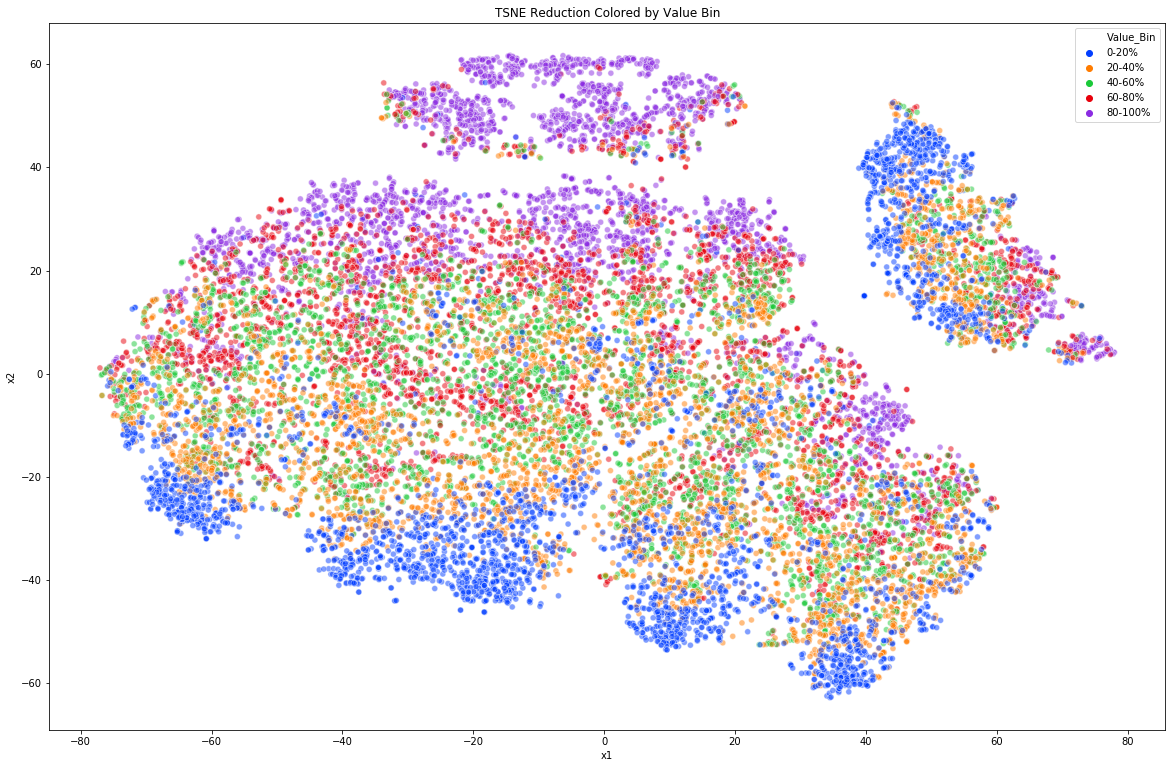

In [871]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Value_Bin',legend="full",alpha=0.5,palette=cmap ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Bin')



### Let's try coloring TSNE using position group

In [872]:
dftsne['Position_Group_Labels'] = fifa.Position_Group

Text(0.5, 1.0, 'TSNE Reduction Colored by Position Group')

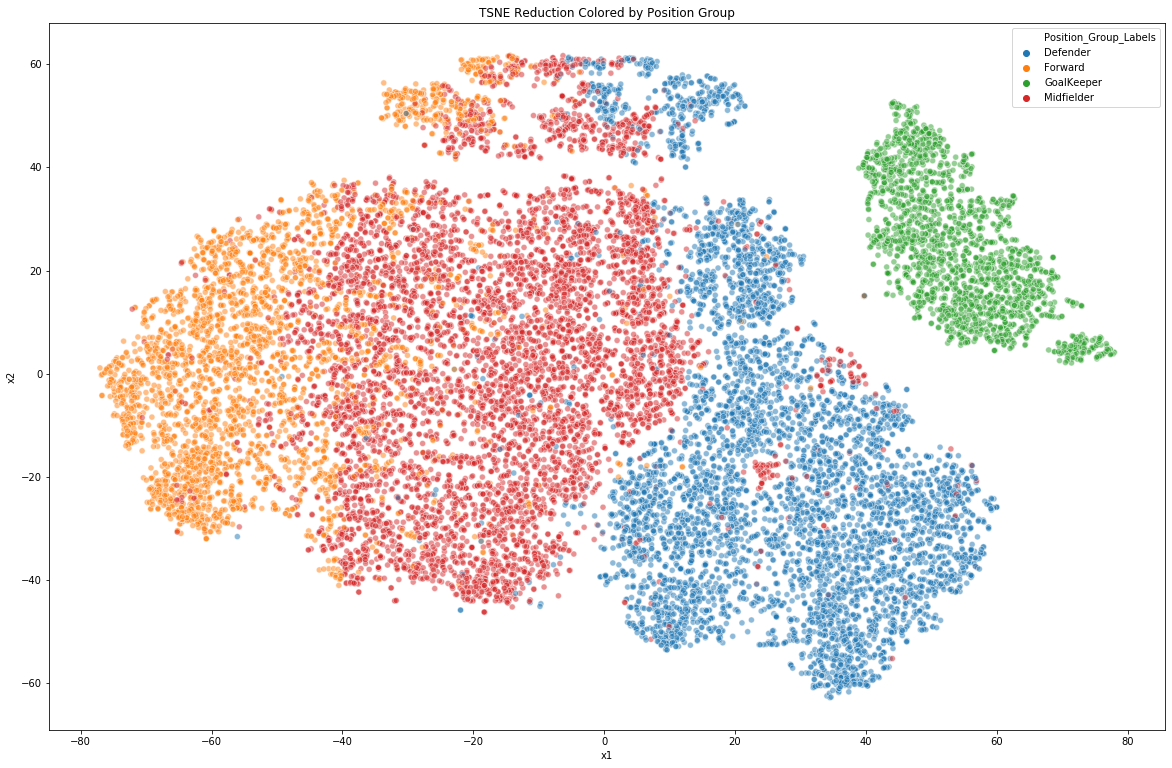

In [873]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Position_Group_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Position Group')


### Try by Continent

Text(0.5, 1.0, 'TSNE Reduction Colored by Continent')

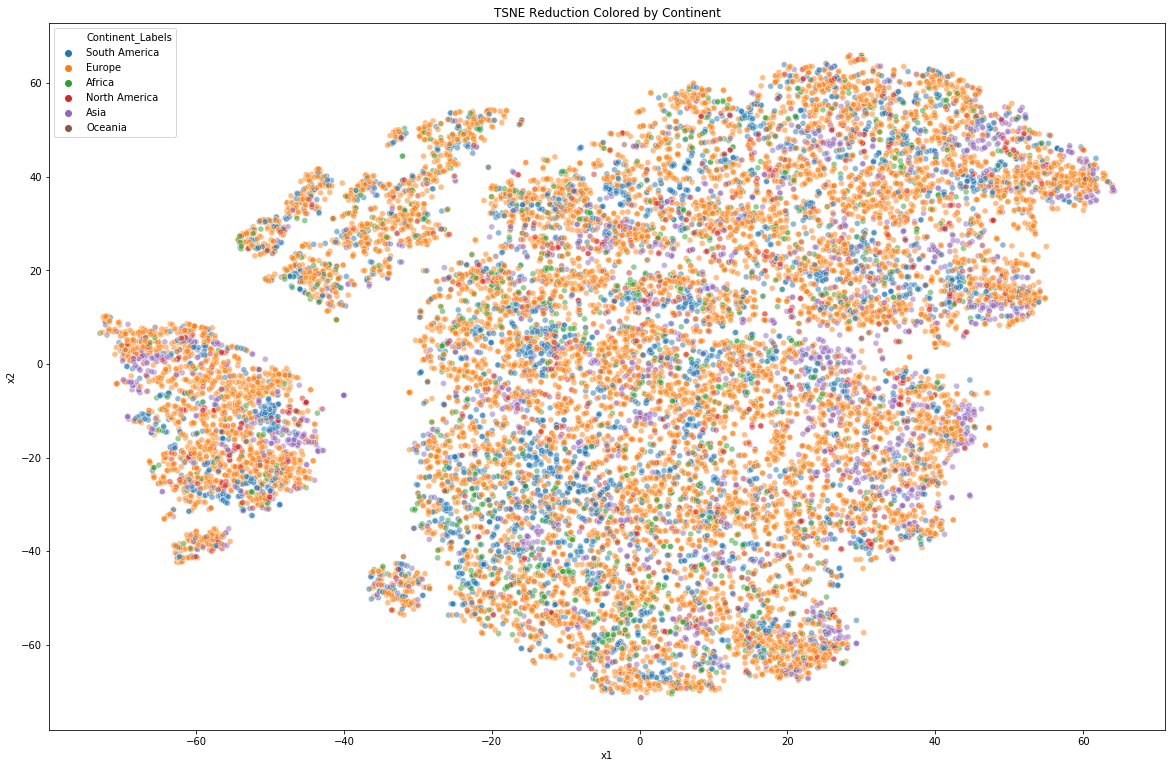

In [354]:
dftsne['Continent_Labels'] = fifa.Continent

fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Continent_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Continent')

In [372]:
dftsne['Value'] = fifa.Value

Text(0.5, 1.0, 'TSNE Reduction Colored by Value Continuous')

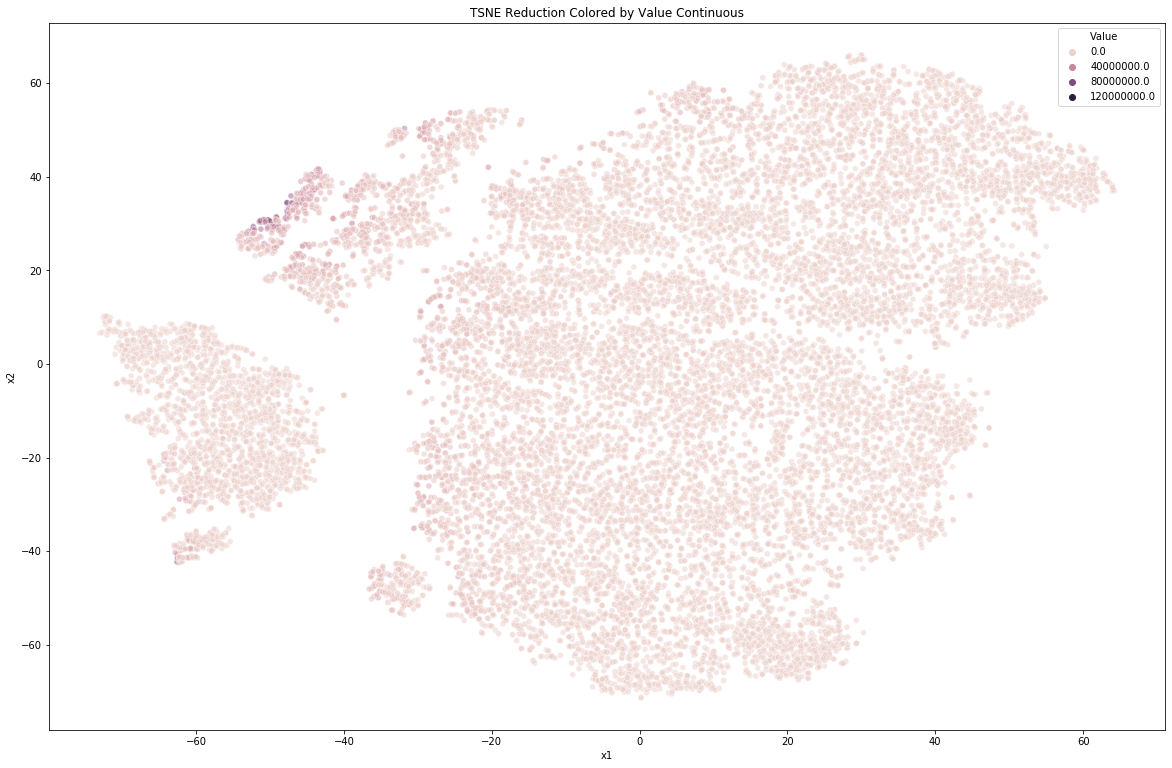

In [453]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", fifa.Value.nunique() )
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Value',alpha=0.5 ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Continuous')




Text(0.5, 1.0, 'TSNE Reduction Colored by Value Continuous')

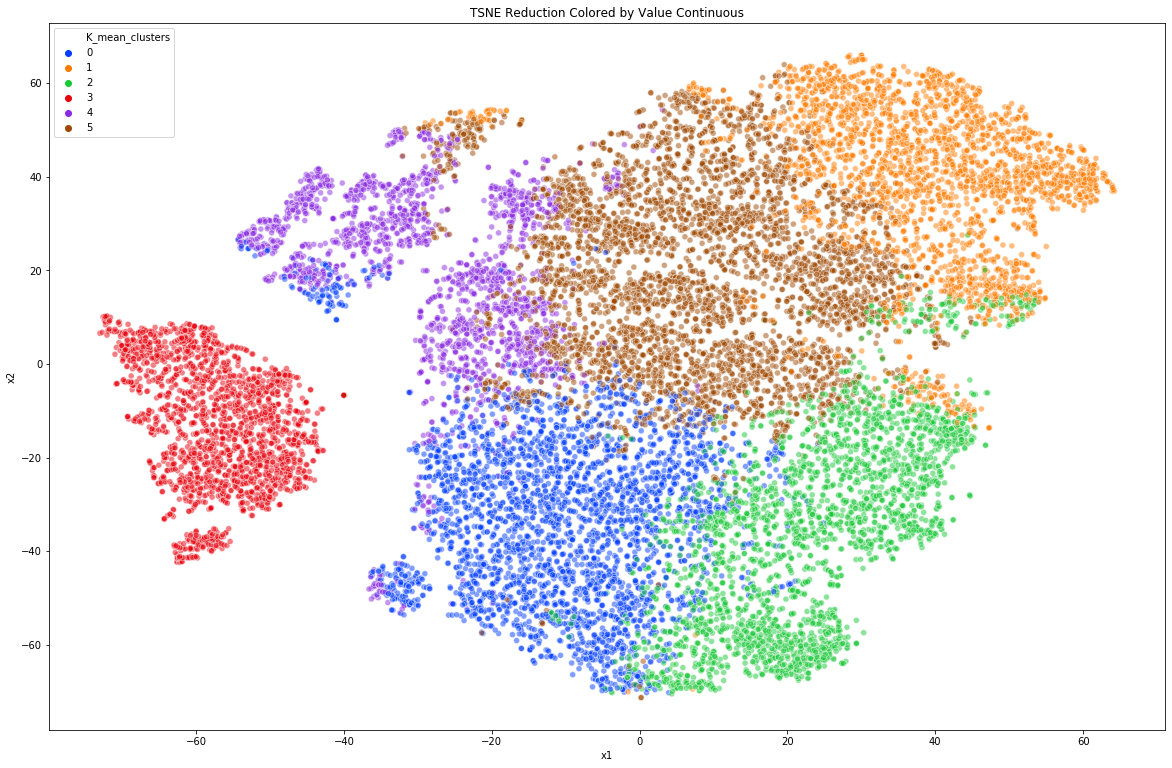

In [764]:
kmeans = KMeans(n_clusters=6)
clustering_ori = kmeans.fit_predict(predictors_scaled)

dftsne['K_mean_clusters'] = clustering_ori

fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 6 )
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='K_mean_clusters',alpha=0.5 ,ax=ax, legend = 'full', palette=cmap)
ax.set_title('TSNE Reduction Colored by Value Continuous')



# K-Mean clustering analysis of clusters

In [355]:
kmeans = KMeans(n_clusters=6)
clustering_ori = kmeans.fit_predict(predictors_scaled)

In [383]:
predictors_w_cluster = predictors.copy()
predictors_w_cluster['cluster'] = clustering_ori

In [384]:
predictors_w_cluster.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Height  Weight  LS  ST  RS  LW  LF  CF  \
0        4.0          4.0          1     170     159  88  88  88  92  93  93   
1        4.0          5.0          1     188     183  91  91  91  89  90  90   
2        5.0          5.0          1     175     150  84  84  84  89  89  89   
3        3.0          1.0          1     193     168   0   0   0   0   0   0   
4        5.0          4.0          1     180     154  82  82  82  87  87  87   

   RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
0  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   
1  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   
2  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   
3   0   0    0    0    0   0    0   0    0   0    0    0    0    0    0   0   
4  87  87   88   88   88  88   87  87   87  88   77   77   77   77   77  73   

   LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0   47  47   47  59      84.0       95.0             70.0          90.0   
1   53  53   53  61      84.0       94.0             89.0          81.0   
2   47  47   47  60      79.0       87.0             62.0          84.0   
3    0   0    0   0      17.0       13.0             21.0          50.0   
4   66  66   66  73      93.0       82.0             55.0          92.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
3     13.0       18.0   21.0        19.0         51.0         42.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   

   Acceleration  SprintSpeed  Agility  ...  Position_Potential  Attacking  \
0          91.0         86.0     91.0  ...                   2       85.0   
1          89.0         91.0     87.0  ...                   3       87.0   
2          94.0         90.0     96.0  ...                   3       79.2   
3          57.0         58.0     60.0  ...                   0       22.8   
4          78.0         76.0     79.0  ...                   3       80.8   

   Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1   83.2      86.6   90.0  74.833333  27.333333         11.6   
2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3   30.2      61.6   43.4  42.666667  16.333333         88.8   
4   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0             0            0            0            0   
3            0             0            0            0            1   
4            0             0      

In [385]:
# Some functions to plot just the variables that has significant deviation from global mean
def outside_limit(df, label_col, label, sensitivity):
    feature_list = predictors_w_cluster.columns[:-38]
    
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []
    
    for i,varname in enumerate(feature_list):
        #     get overall mean for a variable, set lower and upper limit
        mean_overall = df[varname].mean()
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)
        
        #     get cluster mean for a variable
        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()
        
        
        #     create filter to display graph with 0.5 deviation from the mean
        if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
            plot_list.append(varname)
            mean_overall_std = mean_overall/mean_overall
            mean_cluster_std = mean_cluster/mean_overall
            mean_overall_list.append(mean_overall_std)
            mean_cluster_list.append(mean_cluster_std)
            
    mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
    
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
    
    return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
    
    mean_df = outside_limit(df, label_col, label, sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
    
    if len(mean_df.index) != 0:
        sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)
        
        
        for i,p in enumerate(ax.patches):
            ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
    ax.set_title('Unique Characteristics of Cluster ' + str(label))
    ax.set_xlabel('Standardized Mean')
    ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
    ax= ax.ravel()
    
    label = np.arange(n_clusters)
    
    for i in label:
        plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
        ax[i].xaxis.set_tick_params(labelbottom=True)
    
    plt.tight_layout()
    

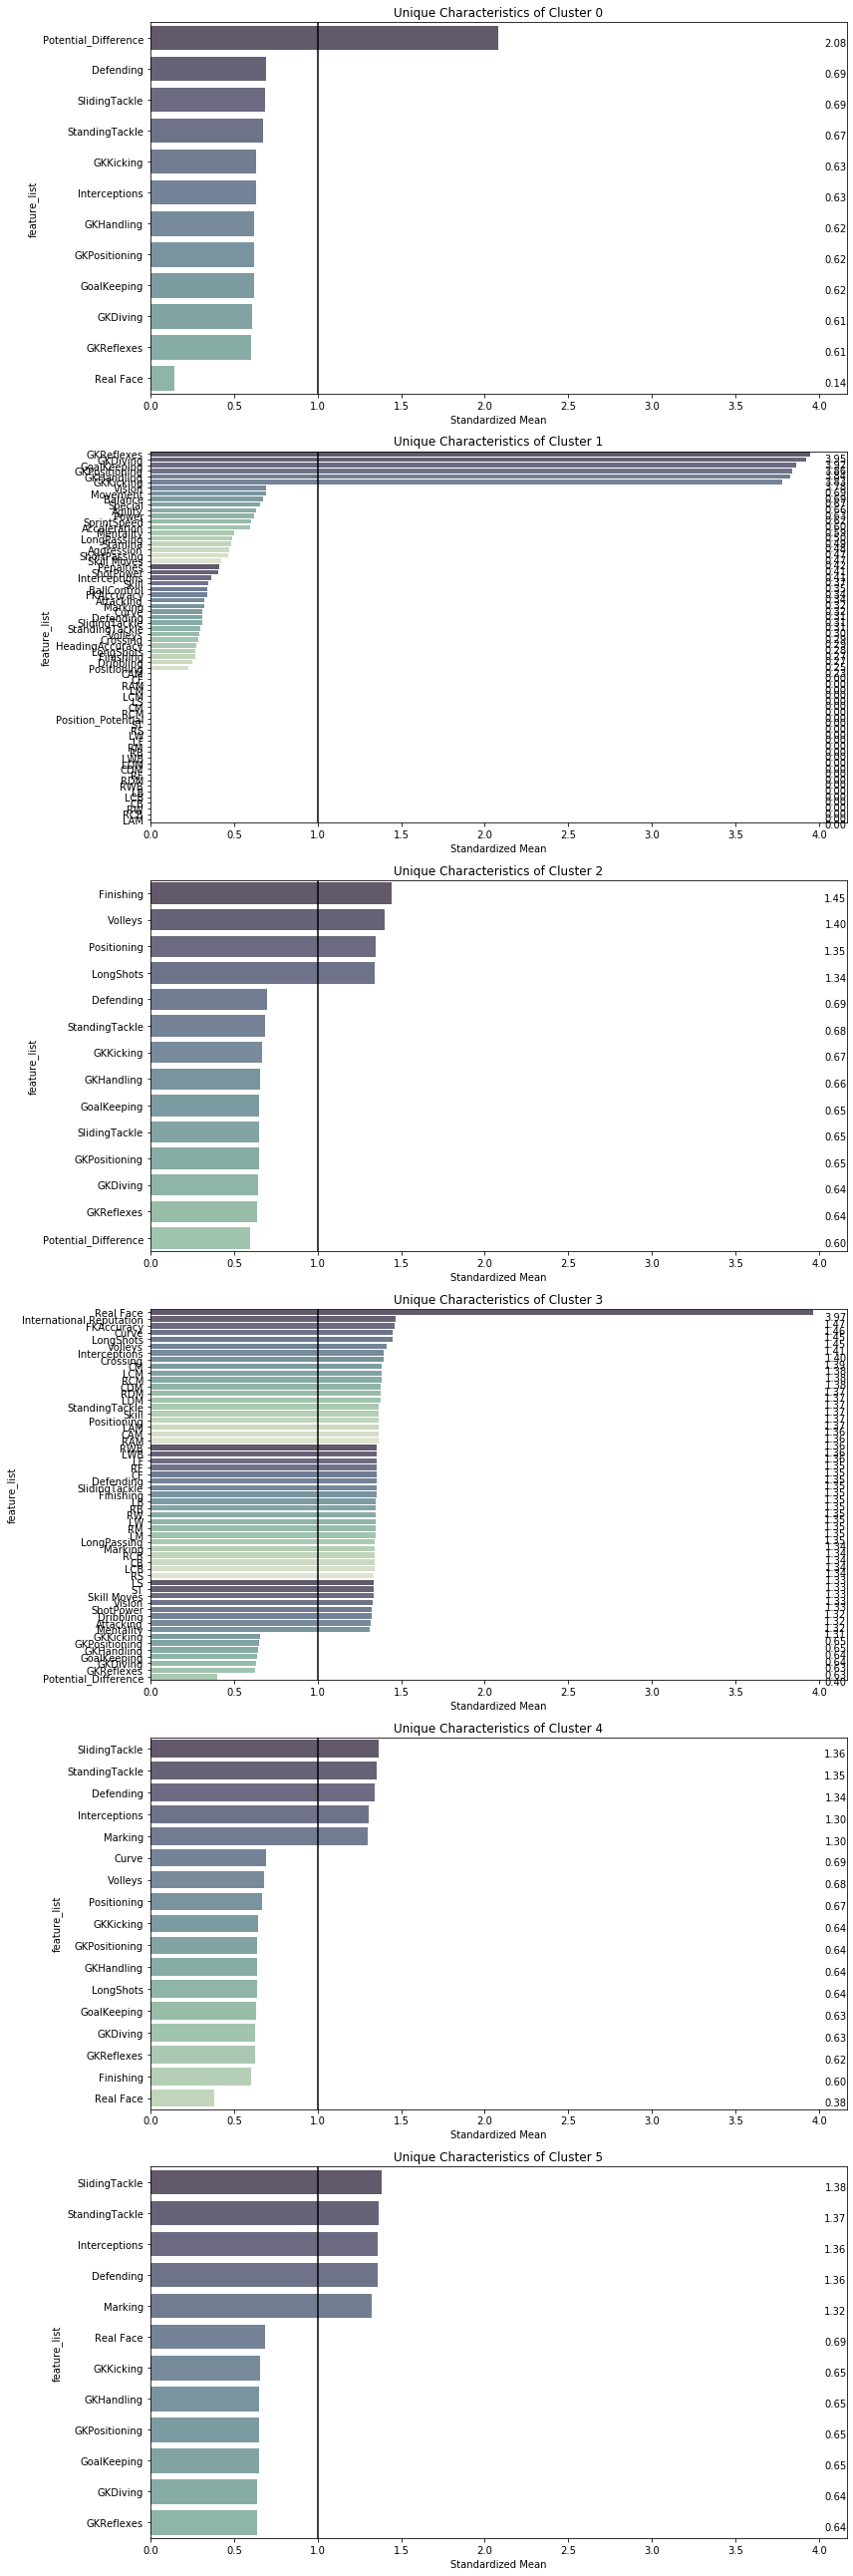

In [387]:
plot_features_all_cluster(df=predictors_w_cluster, label_col='cluster', n_clusters=6, sensitivity=0.3)